In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

from os import listdir
import os, fnmatch

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.family'] = 'sans-serif'

%matplotlib inline

# go through the directory and find all dbf files
# take the filename and put them in the list
# for each filename, create dataframe

mypath = os.getcwd()

csvFiles = fnmatch.filter(os.listdir('data/yearlyweather'), '*.csv')

csvFiles

In [ ]:
dfList = []
#joins all dataframes to startTable based on unique ID
for fileName in csvFiles:
    #table = DBF(fileName)
    frame = pd.read_csv('data/yearlyweather/' + fileName)
    dfList.append(frame)

df = pd.concat(dfList)

df.head(100)


In [ ]:
df.describe()


In [ ]:
filtered = df[['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'NAME', 'TAVG', 'TMAX', 'TMIN']]
# filtered = df.ix[0,0:2].copy()

filtered.head(10)

In [ ]:
filtered.describe()

In [ ]:
filtered = filtered.dropna(subset = ['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'TAVG', 'TMAX', 'TMIN'], how = 'any')

In [ ]:
filtered.describe()

In [ ]:
filtered.head(100)

In [ ]:
# filtered.to_excel('filtered_table.xlsx', sheet_name='Sheet1')
filtered.to_excel('filtered_table.xlsx')

In [14]:
def make_point(row):
    return Point(row['LONGITUDE'], row['LATITUDE'])

# Go through every row, and make a point out of its lat and lon
points = filtered.apply(make_point, axis=1)

# Make a new GeoDataFrame
# using the data from our old df
# but also adding in the geometry we just made
weatherinfo = gpd.GeoDataFrame(filtered, geometry=points)

# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
weatherinfo.crs = {'init': 'epsg:4326'}

# Let's look at the first few
print(weatherinfo['STATION'].unique())
weatherinfo.head(10)


['USC00248857' 'USR0000VERN']


,STATION,DATE,LATITUDE,LONGITUDE,NAME,TAVG,TMAX,TMIN,geometry
0,USC00248857,1924,44.65,-111.1,"WEST YELLOWSTONE, MT US",-0.14,9.53,-9.80,POINT (-111.1 44.65)
1,USC00248857,1932,44.65,-111.1,"WEST YELLOWSTONE, MT US",0.27,9.55,-9.01,POINT (-111.1 44.65)
2,USC00248857,1933,44.65,-111.1,"WEST YELLOWSTONE, MT US",1.80,10.74,-7.15,POINT (-111.1 44.65)
3,USC00248857,1934,44.65,-111.1,"WEST YELLOWSTONE, MT US",3.95,13.73,-5.83,POINT (-111.1 44.65)
5,USC00248857,1939,44.65,-111.1,"WEST YELLOWSTONE, MT US",2.64,12.41,-7.13,POINT (-111.1 44.65)
6,USC00248857,1940,44.65,-111.1,"WEST YELLOWSTONE, MT US",2.73,12.27,-6.80,POINT (-111.1 44.65)
7,USC00248857,1941,44.65,-111.1,"WEST YELLOWSTONE, MT US",2.48,11.30,-6.33,POINT (-111.1 44.65)
8,USC00248857,1942,44.65,-111.1,"WEST YELLOWSTONE, MT US",1.35,10.76,-8.07,POINT (-111.1 44.65)
10,USC00248857,1944,44.65,-111.1,"WEST YELLOWSTONE, MT US",0.97,10.22,-8.28,POINT (-111.1 44.65)
11,USC00248857,1945,44.65,-111.1,"WEST YELLOWSTONE, MT US",1.37,9.70,-6.97,POINT (-111.1 44.65)


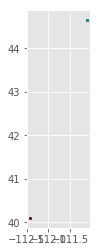

In [11]:
weatherinfo.plot()

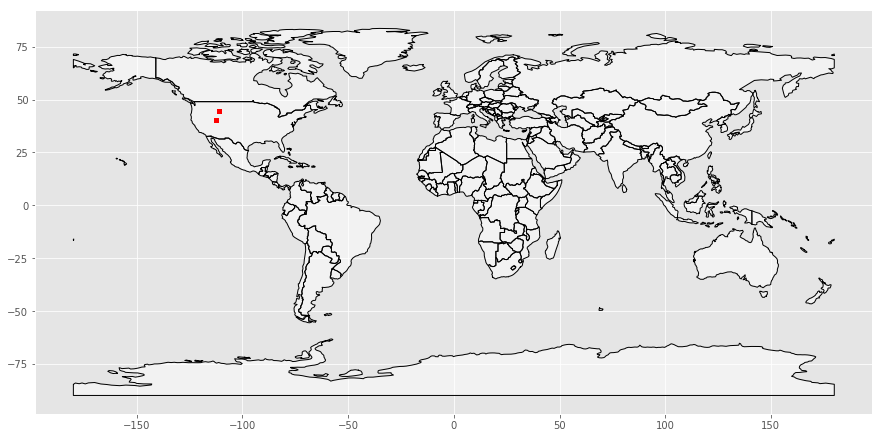

In [17]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.family'] = 'sans-serif'

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

base = world.plot(color='white', edgecolor='black')

weatherinfo.plot(ax=base, marker='o', color='red', markersize=4);